# Práctica con ordenador 1. Teoría de la coalescencia

## Preparación del ordenador
Si intentas utilizar este archivo en tu propio ordenador debes asegurarte de tener instalado `jupyter lab`, `R`, y el paquete de `R` `learnPopGen` [1]. Después, ejecuta el bloque siguiente para activar las funciones necesarias. Si reinicias el *kernel* en algún momento deberás volver a ejecutar este bloque.

In [2]:
# El paquete "learnPopGen" debe estar previamente instalado.
# Lo puedes instalar con el comando: install.packages('learnPopGen')
library('learnPopGen')
# Además, el script "genealogia.R" contiene las funciones "genealogia()" i "mrca()".
source('genealogia.R')

## Cómo utilizar este documento
Esto es un cuaderno de Jupyter que combina texto y comandos de lenguaje informático `R` que se puede ejecutar. Es necesario tener en cuenta lo siguiente:

- Este documento es completamente editable: puedes introducir cambios, personalizarlo, ampliarlo e incluso destruirlo accidentalmente! 
- Cada 2 minutos se guarda automáticamente la versión actual en un *checkpoint*, y puedes recuperar el último *checkpoint* con el menú `File -> Revert Notebook to Checkpoint`.
- También puees guardar los cambios con `File -> Save Notebook` o con la combinación de teclas `Ctrl+S`.
- Los bloques de texto como éste se pueden editar haciendo doble click encima. Observarás que se utiliza la sitaxis *markdown* para transformar el texto plano en HTML.
- Presiona el botón de *play* sobre estas líneas, o ves a `Run -> Run Selected Cell`, o presiona `Shift+Enter` para *ejecutar* una celda o bloque. Si es una celda de texto que estabas editando, volverá a mostrarse en un formato visualmente más cómodo. 
- Es recomendable ejecutar los bloques de código en orden: para que funcione bien un bloque de código, es posible que se deba haber ejecutado el anterior. Puedes ejecutar el documento completo con `Run -> Run All Cells`, con la opción de reiniciar el *kernel* primero, lo cual borraría los resultados de ejecuciones anteriores. 

## Objetivos de la práctica
- Familiarizarnos con el concepto y las características el proceso de **coalescencia**.
- Realizar simulaciones de la coalescencia y estimar algunos parámetros.
- Comparar los parámetros estimados con los esperados a partir de la teoría.

## Ejercicio 1. Número de descendientes vivos
Utiliza la función `coalescent.plot()` para simular y representar gráficamente una población de Fisher-Wright de 20 individuos haploides (`n=20`) durante 40 generaciones (`ngen = 40`). Contesta (en este mismo documento) las preguntas siguientes.

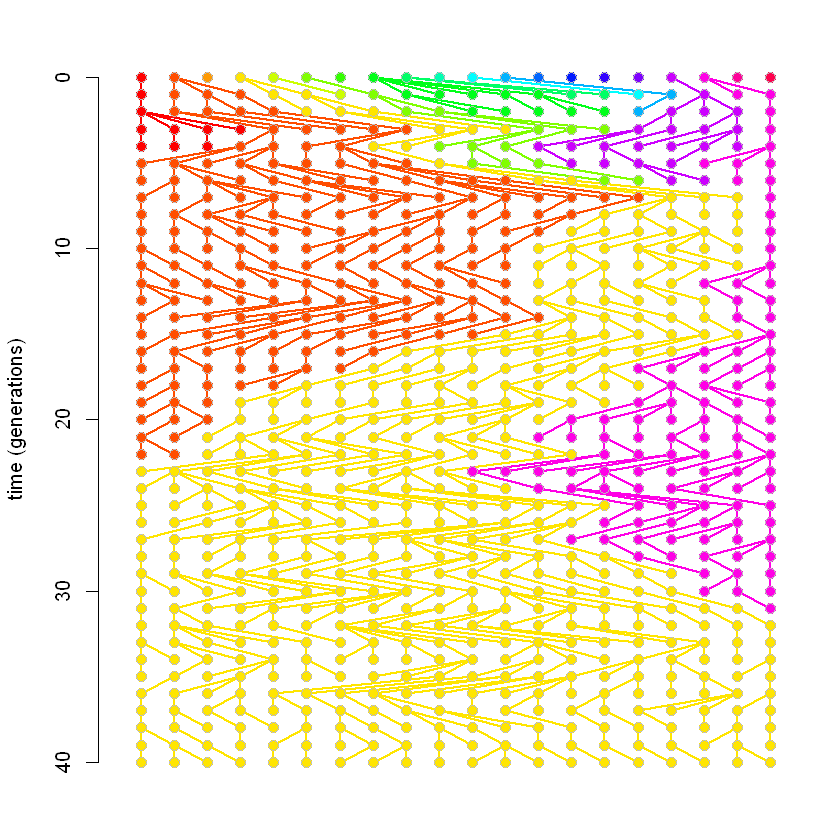

In [14]:
sim01 <- coalescent.plot(n = 20, ngen = 40, sleep = 0)

### 1.1 ¿Cuál es la media del número de descendientes de un individuo en la generación cero que están vivos (presentes) en la generación 40? Es decir, ¿cuántos descendientes vivos de aquí a 40 generaciones puede esperar que le queden un individuo cualquiera de la generación actual?
[Aquí tu respuesta]

### 1.2 ¿Depende el resultado el número de generaciones que dejamos pasar?
[Aquí tu respuesta]

### 1.3 ¿Depende del tamaño de la población?
[Aquí tu respuesta]

### 1.4 ¿Es la media un valor representativo de los valores observados?
[Aquí tu respuesta]

### 1.5 Lee el texto siguiente ¿cuál es tu opinión?

> Supón que la población de Dinamarca cumple las suposiciones: 6 millones de personas, un número inefinido de generaciones en el pasado, sin estructura social y con un tiempo de generación de 25 años. Para estar prácticamente seguros de que un individuo de entonces, o bien no tiene ningún descendiente en el presente, o bien es el ancestro de todos los individuos en el presente, deberíamos remontarnos 966 años. Como el rey Gorm (primer rey danés, fallecido en el año 958) tiene descendientes en la población actual, debe ser necesariamente el ancestro de todo el reino.

<div style="text-align: right"> Hein, J., Schierup, M.H. i Wiuf, C. 2005, p. 251 </div>

## Ejercicio 2. Tiempo de coalescencia de 2 individuos
El objetivo es estimar la media y la varianza del número de generaciones que nos debemos remontar en el pasado para encontrar el ancestro común más reciente de dos individuos actuales elegidos al azar. Para obtener unos valores representativos es necesario utilizar al menos 10 simulaciones diferentes. Simularemos poblaciones de 20 individuos durante 60 generaciones. Para elegir 2 individuos aleatorios entre 20, utiliza la función `sample(1:20, 2)`. Para facilitar la identificación del ancestro común más reciente, utiliza la función `genealogia()`, que necesita que especifiquemos dos parámetros: el nombre de la simulación realizada y los individuos elegidos aleatoriamente, de los cuales queremos conocer la genealogía:

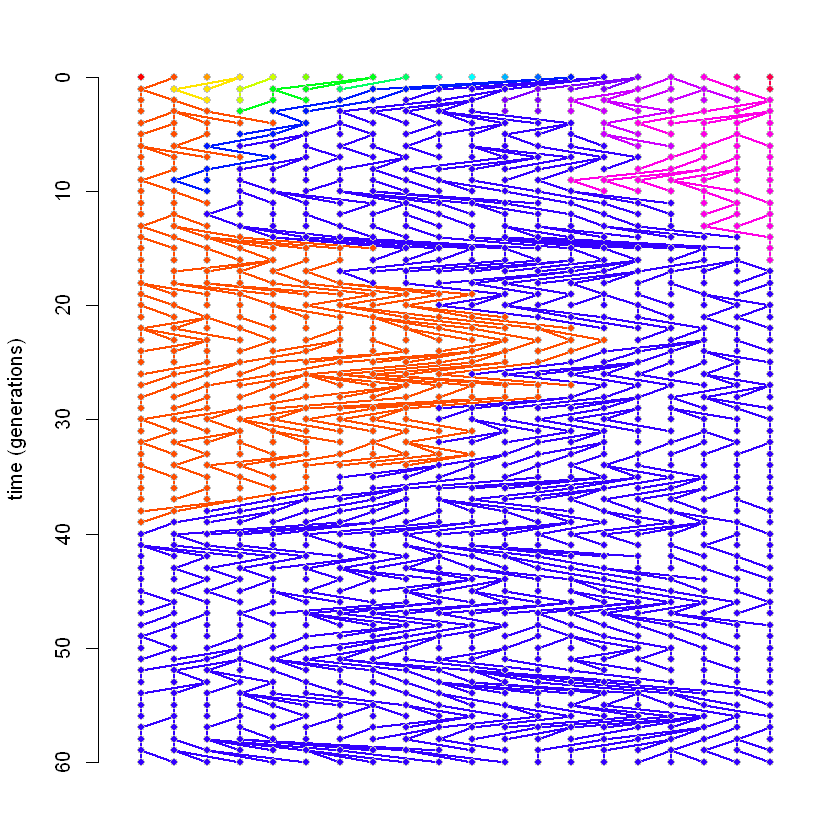

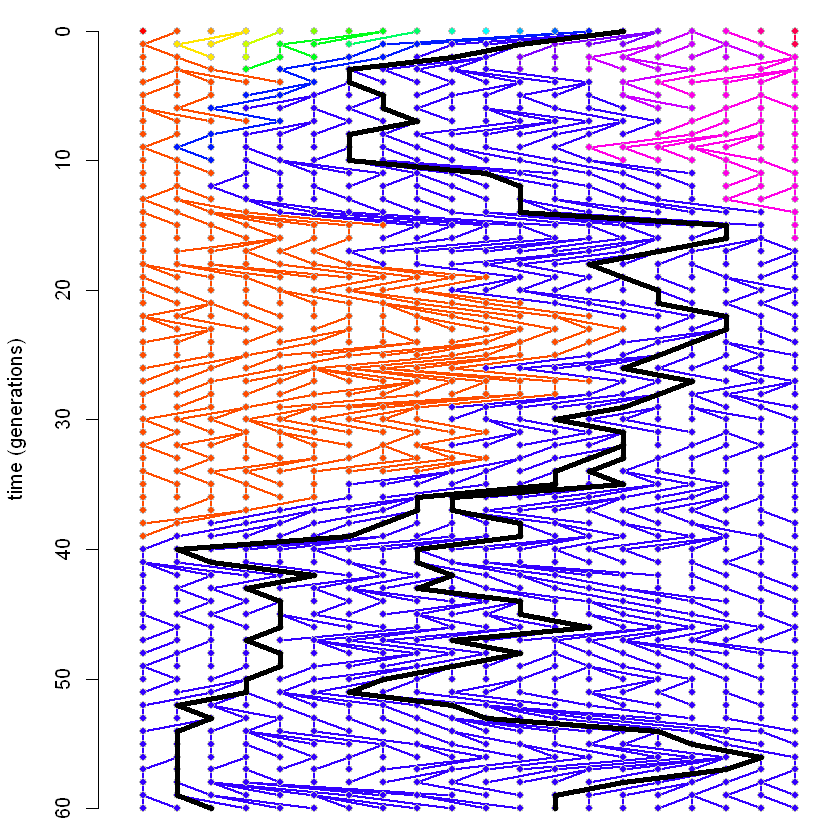

In [24]:
# Este es el bloque que debes ejecutar al menos 10 veces.
# Guarda el resultado "coalescent.plot()" en un objeto
# ("sim02" o como le quieras llamar), para poder añadir al gráfico la
# genealogía de los individuos elegidos al azar.

sim02  <- coalescent.plot(n = 20, ngen = 60, sleep = 0)
muestra <- sample(1:20, 2)
genealogia(sim02, muestra)

Si en alguna de las simulaciones, 60 generaciones atrás todavía existen 2 ancestros diferentes para los dos individuos seleccionados aleatoriamente, se debe hacer lo siguiente:

1. Simular otra vez 60 generaciones, que representan las anteriores a las de la simulación original.
2. Identificar al ancestro común más reciente de *otros dos* individuos elegidos nuevamente al azar (que representan los ancestros respectivos de los que habías elegido primero).
3. Y añadir a 60 el número de generaciones que te has tenido que remontar en la segunda simulación para encontrar aquel ancestro común más reciente. 

### 2.1 ¿Cuáles son la media y la varianza del número de generaciones que te has tenido que remontar en el pasado para encontrar al ancestro común más reciente de los dos individuos haploides elegidos al azar en las simulaciones?

In [1]:
# Puedes estimar la media y la varianza de los número obtenidos aquí,
# sustituyendo los "NA" por los valores obtenidos:
Valores_obtenidos <- c(NA, NA, NA, NA, NA, NA, NA, NA, NA, NA)
mean(Valores_obtenidos)
var(Valores_obtenidos)

[1] NA

[1] NA

### 2.2 ¿Cuáles deberían ser la media y la varianza de acuerdo con la teoría? Compáralos con los valores estimados.

### 2.3 Si el tamaño poblacional efectivo de la población humana fuera de 10000 individuos, ¿cuántas generaciones nos deberíamos remontar al pasado para encontrar al ancestro común más reciente del ADN mitocondrial de dos individuos elegidos al azar?

### 2.4 ¿Y para encontrar al ancestro común más reciente de dos copias de un gen nuclear?

## Ejercicio 3. Tiempo de coalescencia de 5 individuos.
Realizar de nuevo las simulaciones, pero ahora buscando el ancestro común más reciente de 5 individuos elegidos al azar en una población de 20 individuos. Puedes hacer el muestreo con la función `sample(1:20, 5)`. Esta vez, para ayudarte a contar las generaciones, puedes utilizar la función  `mrca()`, que necesita dos argumentos: la simulación obtenida con `coalescent.plot()` y la muestra de los 5 individuos elegidos al azar. Aprovechando que no es necesario identificar el ancestro común con el gráfico, puedes simular 100 (o más) generaciones, para asegurarte de que encontrarás al ancesto común de los 5 individuos en una sola simulación.

Si a pesar de esto, en la generación más antigua de la simulación todavía había más de un ancestro de los 5 individuos elegidos al azar, será necesario añadir una segunda simulación: la de las 100 generaciones anteriores. Entonces habrá que elegir al azar tantos individuos como ancestros quedaban (seguramente 2), y encontrar su ancestro común más reciente en esta simulación adicional. Finalmente sumamos los dos números: el número de generaciones simuladas inicialmente y el número de generaciones anteriores necesarias para llegar a la coalescencia.

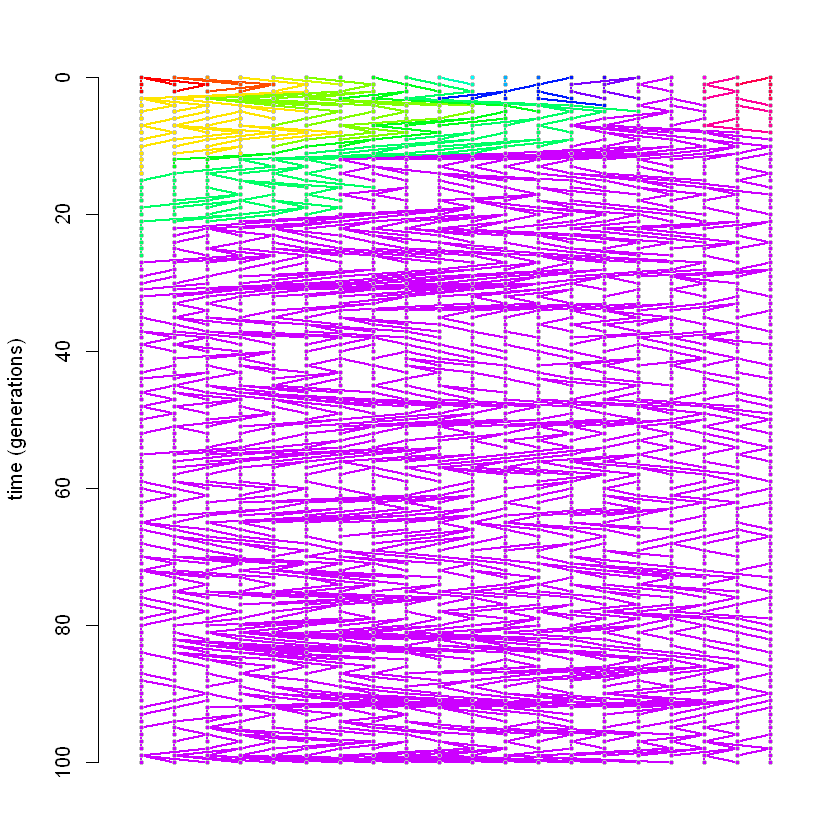

[1] 23

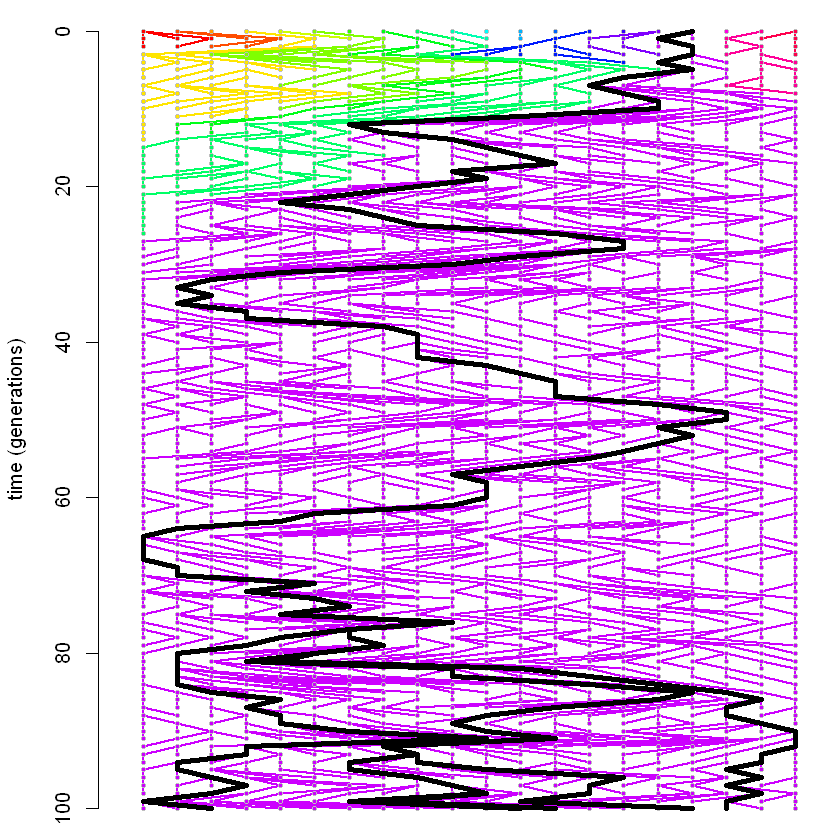

In [38]:
# Ejecútalo al menos 10 veces y toma nota de los resultados.
sim03  <- coalescent.plot(n = 20, ngen = 100, sleep = 0)
muestra <- sample(1:20, 5)
genealogia(sim03, muestra)
mrca(sim03, muestra)

### 3.1 ¿Cuáles son la media y la varianza del número de generaciones que has tenido que remontarte en las genealogías simuladas para encontrar el ancestro común más reciente de los 5 individuos elegidos al azar?

In [1]:
# Puedes ayudarte de esta platilla. 
Valores_obtenidos <- c(NA, NA, NA, NA, NA, NA, NA, NA, NA, NA)
mean(Valores_obtenidos)
var(Valores_obtenidos)

[1] NA

[1] NA

### 3.2 Compara el resultado empírico con la esperanza teórica del número de generaciones que hay que retroceder al pasado para encontrar el ancestro común más reciente de 5 individuos haploides.

### 3.3 ¿Cuál es la fórmula de la esperanza teórica del tiempo de coalescencia de toda una especie?

### 3.4 ¿Qué resultado daría para la coalescencia global del cromosoma mitocondrial humano? Utiliza un tiempo de generación de 20 años para traducir las generaciones en años.

### 3.5 ¿Cuál es el tiempo de coalescencia global para un gen nuclear humano?

### 3.6 Compara los tiempos de coalescencia de 2 individuos ($T_{MRCA}(2)$) y de toda la especie ($T_{MRCA}(N_e)$): te parece que están bien proporcionados?

## Representación dinámica de la coalescencia
Si queda tiempo, visita el enlace [http://bedford.io/projects/coaltrace](http://bedford.io/projects/coaltrace) y observa la representación dinámica y en tiempo continuo del proceso de coalescencia. Las bolas de colores representan individuos, y las líneas que dejan detrás las relacioned de ancestralidad. Los linajes extintos desaparecen. En todo momento vemos un árbol con la forma típica del proceso de coalescencia, y aproximadamente la mitad de toda la profundidad del árbol está ocupada por sólo dos linajes. Si haces *click* sobre el gráfico, activarás los comandos. Pulsa la tecla  *H* para ver las opciones y prueba el efecto de modificar los parámetros siguientes sobre la forma del árbol.

- El tiempo de generación.
- El tamaño poblacional.
- Las mutaciones.
- La migración.

# Apéndice 1. Resumen de la teoría
En una población de Fisher-Wright de tamaño $N$, donde $N$ es el número de **gametos** que pasan de una generación a la siguiente, el tiempo medio hasta la primera coalescencia entre $n$ genes muestreados al azar es:

$$E(T_n) = \frac{N}{\binom{n}{2}} = \frac{2N}{n(n-1)}$$

Y la varianza sería:

$$\sigma^2(T_n) = \frac{4N^2}{(n(n-1))^2}$$

Por tanto, el tiempo esperado para encontrar al ancestro común de dos genes en una población de $N$ gametos es $T_2=N$ generaciones, con una varianza $\sigma^2(T_2)=N^2$.

El tiempo medio hasta la coalescencia completa de una muestra de $n$ genes y su varianza son:

$$E(T_{MRCA}(n)) = \sum_{j=2}^n E(T_j) = \sum_{j=2}^n \frac{2N}{j(j-1)}$$

$$ = 2N\left ( 1 - \frac{1}{n}\right )$$

$$\sigma^2(T_{MRCA}(n)) = 4N\sum_{j=2}^n \frac{1}{j^2(j-1)^2}$$

$$ \sim 1.16N$$

El tiempo medio hasta la coalescencia de todos los $N$ genes de la población, en principio es: $E(T_{MRCA}(N))=2N-2$, de acuerdo con la fórmula anterior. A pesar de que las fórmulas están pensadas para muestras mucho más pequeñas que el tamaño real de la población, este resultado es adecuado, dado que el número de linajes se reduce rápidamente durante las primeras generaciones.

Habiendo definido $N$ como el número de gametos, las fórmulas anteriores son válidas tanto para poblaciones haploides como diploides. Pero en poblaciones diploides es más común referirse al número de individuos. Por tanto, se puede sustituir $N=2N_e$, donde $N_e$ es el número efectivo de individuos. En cualquier caso, se puede generalizar a unidades de coalescencia, definidas como el número de generaciones esperadas hasta la coalescencia de 2 genes. Es decir, si $T_2=1$ unidades de coalescencia, entonces $E(T_n)=\frac{2}{n(n-1)}$, $E(T_{MRCA}(n))=2(1 - 1/n)$ y $E(T_{MRCA}(N)) \sim 2$. Así las fórmulas se aplican a poblaciones de cualquier tamaño. El tamaño poblacional sólo afecta a la escala temporal. En todas las poblaciones de Fisher-Wright se espera que el ancestro común a todos los individuos se remonte sólo al doble del número de generaciones necesarias para encontrar al ancestro común de dos individuos elegidos al azar.
## Bibliografía
[1] Revell LJ (2019). *learnPopGen: Population Genetic Simulations & Numerical Analysis.* R package version 1.0.4, [https://CRAN.R-project.org/package=learnPopGen](https://CRAN.R-project.org/package=learnPopGen)

[2] Hein, J., Schierup, M.H. i Wiuf, C. 2005. *Gene genealogies, variation and evolution; a primer in coalescent theory*. Oxford University Press.
